In [1]:
import os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt 

# Model-Related
import tensorflow as tf
from tensorflow.keras import layers

# Data Preprocessing
from sklearn.model_selection import train_test_split

### Emotion Recognition in Visual Data

This module Extracts / Preprocesses & Explores data from the following datasets:
- CK+
- RAVDESS Facial Landmark Tracking
- Yale Face Database
- AffWild 2
- Microsoft FER+

It will have a Convolutional Neural Network implemented with Keras + TensorFlow back-end and trained on this data.

We will be creating testing sets of the three team members capturing themselves.


In [2]:
def getCK():
    ck_data = h5py.File('../Datasets/CK_data.h5', 'r')
    
    X = np.array(ck_data.get('data_pixel'))
    y = np.array(ck_data.get('data_label'))
    
    return X, y

X, y = getCK()

def preprocessCK(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocessCK(X, y)

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

Training Data:  (882, 48, 48)
Training Labels (882,)
Validation Data:  (99, 48, 48)
Validation Labels:  (99,)


In [3]:
# Prepare inputs.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = np.float32(X_train) / X_train.max()
y_train = tf.keras.utils.to_categorical(y_train)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = np.float32(X_test) / X_test.max()
y_test = tf.keras.utils.to_categorical(y_test)

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size = (4, 4), activation = 'tanh', strides = (1, 1), padding = "same"),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(7, activation = 'softmax')
])


model.compile(optimizer = tf.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train)

28/28 [==============================] - 1s 21ms/step - loss: 1.5681 - accuracy: 0.4807


In [6]:
model.evaluate(X_test, y_test)

# Categorical Accuracy?

4/4 [==============================] - 0s 4ms/step - loss: 1.1214 - accuracy: 0.6061


[1.1213968992233276, 0.6060606241226196]

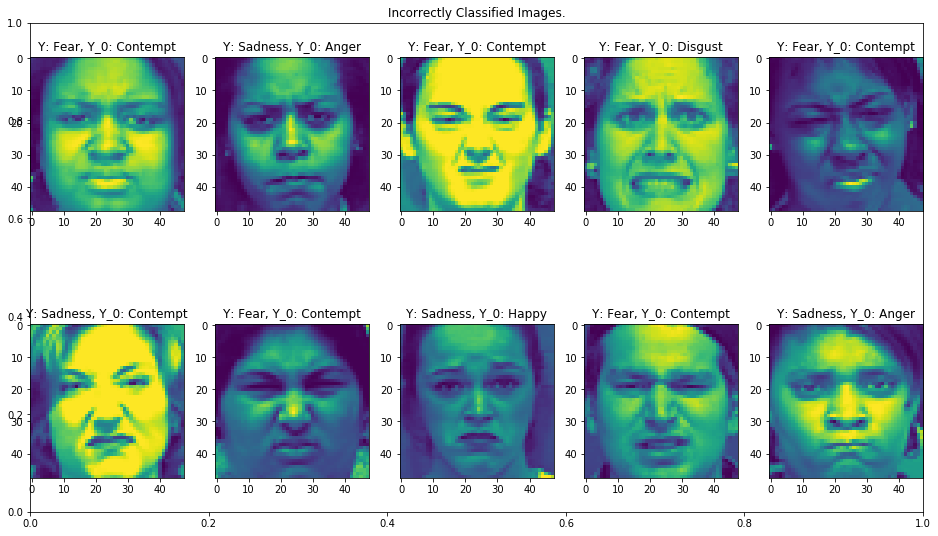

In [56]:
pred = model.predict(X_test, batch_size = 1)


emotion_labels = ['Anger','Contempt','Disgust','Fear','Happy','Sadness', 'Surprise']

figure = plt.figure(figsize = (16, 9))

i = 0
imgcount = 1
plt.title('Incorrectly Classified Images.')

while imgcount < 11:
    
    if(y_test[i].argmax() != pred[i].argmax()):
        figure.add_subplot(2, 5, imgcount)
        plt.imshow(X_test[i].reshape((48, 48)))
        imgcount += 1
        plt.title('Y: '+ emotion_labels[pred[i].argmax()] +  ', Y_0: ' + emotion_labels[y_test[i].argmax()])
        
    i += 1

plt.show()

In [ ]:
def getRDS():
    return

def preprocessRDS():
    return

In [ ]:
def getYale():
    return

def preprocessYale():
    return

In [ ]:
def getAW2():
    return

def preprocessAW2():
    return

In [ ]:
def getFER():
    return

def preprocessFER():
    return

### Image Classification with Convolutional Neural Network

- Using Keras with Tensorflow Back-end to Design, Train, Tune & Test a CNN